# Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
# Import TensorFlow:

import tensorflow as tf

/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:472: FutureWarnin

# Recurrent Neural Networks

In [3]:
# Recurrent Neural Networks specialize in Predicting future events based on the past.
# RNNs analyze time series data such as stock prices to predict when to buy and sell.
# In autonomous driving vehicles, they can anticipate car trajectories and help avoid accidents.
# They can create songs or paintings, generate sentences, etc...

In [4]:
# Up until now, we have mostly looked at feedforward neural networks, where activations flow only in one direction, from input to output layer.
# A RNN looks very much like a feed forward neural network, except that it also has connections pointing backwards.

# Let's look at the simplest possible RNN, composed of just one neuron recieving inputs, producing an output, and sending the output back to itself.
# At each time step t, this recurrent neuron recieves the inputs X_t as well as its own output from the previous timestep.
# Each recurrent neuron has two sets of weights: one for the input and the other for the outputs of the previous time step.



# Memory Cells

In [5]:
# Memory Cells: Since the output of a recurrent neuron at the time step t is a function of all the inputs from the previous time steps, you could say that it has a form of memory.
# A part of of a neural network that preserves some state across time steps is called a memory cell.
# single recurrent neuron, or a layer of recurrent neurons is a very basic cell.
# However, later in the chapter we will see much more powerful and complex cell constructions.

# Input and Output Sequences

In [6]:
# A RNN can simultaneously take a sequence of inputs and produce a sequence of outputs.
# For example, for stocks you can feed it prices over the last N days, and it must output the prices shifted by one day into the future.
# Alternatively, you could feed the network a sequence of inputs, and ignore all outputs except for the last one.
    # For example, feed the network a sequence of words corresponding to a movie review. The network would output a sentiment score.
    # This is a Sequence-to-Vector Network
# Conversely, you could feed the network a single input at the first time step, and let it output a sequence.
    # An example is inputting an image, and the output would be a caption for that image.
    # This is called a Vector-to-Sequence Network.
    
# Lastly you could have a Sequence-to-Vector network called an Encoder, followed by a Vector-to-Sequence Network called a Decoder.
    # This structure could be used for a language translator.



# Manual RNNs

In [7]:
# Let's implement a very simple RNN model without using any of TensorFlow's RNN Operations to better understand what goes on under the hood.

# We will create a RNN composed of a layer of five recurrent neurons using the tanh activation function.
# We will assume the RNN runs over only two time steps, taking input vectors of size 3 at each time step.

reset_graph()

n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons], dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.global_variables_initializer()

In [8]:
# The network above looks much like a two layer feedforward neural network, with a few twists"
    # the same weights and bias terms are shared by both layers.
    # we feed inputs at each layer, and we get outputs from each layer.
    
# To run the model, we need to feed it the inputs at both times steps like so:

import numpy as np

X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})
    
# This mini-batch contains four instances, where each instance is a sequence composed of exactly two 3D inputs.
# At the end, Y0_val, and Y1_val contain the outputs of the network at both time steps for all neurons and all instances of the mini-batch.

In [9]:
print(Y0_val)

[[-0.0664006   0.9625767   0.68105793  0.7091854  -0.898216  ]
 [ 0.9977755  -0.719789   -0.9965761   0.9673924  -0.9998972 ]
 [ 0.99999774 -0.99898803 -0.9999989   0.9967762  -0.9999999 ]
 [ 1.         -1.         -1.         -0.99818915  0.9995087 ]]


In [10]:
print(Y1_val)

[[ 1.         -1.         -1.          0.4020025  -0.9999998 ]
 [-0.12210421  0.6280527   0.9671843  -0.9937122  -0.25839362]
 [ 0.9999983  -0.9999994  -0.9999975  -0.8594331  -0.9999881 ]
 [ 0.99928284 -0.99999815 -0.9999058   0.9857963  -0.92205757]]


In [11]:
# Writing all this code would become very tedios as the number of time steps increases. 
# therefore, let's use TensorFlow's RNN operations.

# Using static_rnn()

In [12]:
n_inputs = 3
n_neurons = 5

In [13]:
# The static_rnn() function creates an unrolled RNN network by chaining cells. 
# The following code creates the exact same model as the previous one:

reset_graph()

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.nn.static_rnn(basic_cell, [X0, X1], dtype=tf.float32)

Y0, Y1 = output_seqs

In [14]:
init = tf.global_variables_initializer()

In [15]:
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [16]:
Y0_val

array([[ 0.30741334, -0.32884315, -0.6542847 , -0.9385059 ,  0.52089024],
       [ 0.99122757, -0.9542542 , -0.7518079 , -0.9995208 ,  0.9820235 ],
       [ 0.9999268 , -0.99783254, -0.8247353 , -0.9999963 ,  0.99947774],
       [ 0.996771  , -0.68750614,  0.8419969 ,  0.9303911 ,  0.8120684 ]],
      dtype=float32)

In [17]:
Y1_val

array([[ 0.99998885, -0.9997605 , -0.06679298, -0.9999804 ,  0.99982214],
       [-0.6524944 , -0.51520866, -0.37968954, -0.59225935, -0.08968385],
       [ 0.998624  , -0.997152  , -0.03308626, -0.9991565 ,  0.9932902 ],
       [ 0.99681675, -0.9598194 ,  0.39660636, -0.8307605 ,  0.7967197 ]],
      dtype=float32)

In [18]:
from tensorflow_graph_in_jupyter import show_graph

ModuleNotFoundError: No module named 'tensorflow_graph_in_jupyter'

# Packing Sequences

In [19]:
# If there were 50 time steps it wouldn't be convenient to have to define 50 input placeholders and 50 output tensors.
# Moreover, at execution time you would have to feed each of the 50 placeholders and manipulate 50 outputs.
# Let's simplify this:


In [20]:
n_steps = 2
n_inputs = 3
n_neurons = 5

In [21]:
reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
X_seqs = tf.unstack(tf.transpose(X, perm=[1, 0, 2]))

basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.nn.static_rnn(basic_cell, X_seqs,
                                       dtype=tf.float32)
outputs = tf.transpose(tf.stack(output_seqs), perm=[1, 0, 2])

In [22]:
init = tf.global_variables_initializer()

In [23]:
X_batch = np.array([
    # t = 0     t = 1
    [[0, 1, 2], [9, 8, 7]], # instance 1
    [[3, 4, 5], [0, 0, 0]], # instance 2
    [[6, 7, 8], [6, 5, 4]], # instance 3
    [[9, 0, 1], [3, 2, 1]], # instance 4
])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [24]:
# We get a single outputs_val tensor for all instances, all time steps, and all neurons:

print(outputs_val)

[[[-0.45652324 -0.68064123  0.40938237  0.63104504 -0.45732826]
  [-0.94288003 -0.9998869   0.94055814  0.9999985  -0.9999997 ]]

 [[-0.8001535  -0.9921827   0.7817797   0.9971031  -0.9964609 ]
  [-0.637116    0.11300932  0.5798437   0.43105593 -0.63716984]]

 [[-0.93605185 -0.9998379   0.9308867   0.9999815  -0.99998295]
  [-0.9165386  -0.9945604   0.89605415  0.99987197 -0.9999751 ]]

 [[ 0.9927369  -0.9981933  -0.55543643  0.9989031  -0.9953323 ]
  [-0.02746334 -0.73191994  0.7827872   0.9525682  -0.97817713]]]


In [25]:
print(np.transpose(outputs_val, axes=[1, 0, 2])[1])

[[-0.94288003 -0.9998869   0.94055814  0.9999985  -0.9999997 ]
 [-0.637116    0.11300932  0.5798437   0.43105593 -0.63716984]
 [-0.9165386  -0.9945604   0.89605415  0.99987197 -0.9999751 ]
 [-0.02746334 -0.73191994  0.7827872   0.9525682  -0.97817713]]


In [26]:
# However, packing still builds a graph containing one cell per time  step.
# If there were 50 time steps, the graph would look pretty ugly.
# It would be like writing a program without ever using loops.
# It would possibly run out of memory during backpropagation.
# Therefore we use the dynamic_rnn() function.

# Dynamic Unrolling Through Time 

In [27]:
# The dynamic_rnn() function uses a while_loop() operation to run over the cell the appropriate number of times.
# You can set the swap_memory=True if you want to swap the GPU's memory to the CPU's memory during backpropagation to avoid OOM errors.
# It also accepts a single input tensor for all time steps.
# The following code creates the same RNN using the dynamic_rnn() function:

In [28]:
n_steps = 2
n_inputs = 3
n_neurons = 5

In [29]:
reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

In [30]:
init = tf.global_variables_initializer()

In [31]:
X_batch = np.array([
    [[0, 1, 2], [9, 8, 7]], # instance 1
    [[3, 4, 5], [0, 0, 0]], # instance 2
    [[6, 7, 8], [6, 5, 4]], # instance 3
    [[9, 0, 1], [3, 2, 1]], # instance 4
])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [32]:
print(outputs_val)

[[[-0.0948875  -0.7863541  -0.75976855  0.81456447 -0.8659667 ]
  [-0.9999981  -0.99989897 -0.9999942   0.9995981  -0.4085584 ]]

 [[-0.9882368  -0.9937984  -0.99848306  0.99407357 -0.9553898 ]
  [ 0.21658944 -0.20340651  0.02591269  0.44528607 -0.40116802]]

 [[-0.99991536 -0.99983823 -0.99999166  0.9998272  -0.98561245]
  [-0.9998106  -0.9926861  -0.99952865  0.9938598  -0.2555965 ]]

 [[-0.9988372   0.84198505 -0.97267133 -0.869843    0.99912703]
  [-0.97511095 -0.34840977 -0.9212813   0.39821982  0.27953893]]]


# Handling Variable Length Sequences

In [33]:
# To handle variable sequence lengths such as translating sentences:
    # You should set the sequence_length argument when calling the dynamic_rnn() or static_rnn() function.
    # It must be a 1D tensor indicating the length of the input sequence for each instance.
    
n_steps = 2
n_inputs = 3
n_neurons = 5

reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)

In [34]:
seq_length = tf.placeholder(tf.float32, [None])
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32, sequence_length=seq_length)

In [35]:
init = tf.global_variables_initializer()

In [36]:
# Suppose the second input sequence contains only one input instead of two.
# It must be padded with a zero vector in order to fit in the input tensor X.
X_batch = np.array([
    # step 0    step 1
    [[0, 1, 2], [9, 8, 7]], # instance 1
    [[3, 4, 5], [0, 0, 0]], # instance 2 (padded w/zero vectors)
    [[6, 7, 8], [6, 5, 4]], # instance 3
    [[9, 0, 1], [3, 2, 1]], # instance 4
])

seq_length_batch = np.array([2, 1, 2, 2])

In [37]:
# Of course, you now need to feed values for both placeholders X and seq_length:

with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch, seq_length: seq_length_batch})

In [38]:
# Now the RNN outputs zero vectors for every time step past the input sequence length:

print(outputs_val)

[[[-0.11615925  0.750732    0.63682985 -0.08249713 -0.11553881]
  [ 0.999952    0.99999666  1.         -0.99973685 -0.03521607]]

 [[ 0.92005515  0.9972363   0.99906594 -0.911732   -0.30982354]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 0.9972582   0.999973    0.9999979  -0.9949823  -0.4812758 ]
  [ 0.99302244  0.9998791   0.99999243 -0.97590363  0.45262337]]

 [[ 0.99989635  0.9961638   0.99996877 -0.99761426 -0.85872555]
  [ 0.6996408   0.9849429   0.9967938  -0.64482135  0.41305888]]]


In [39]:
print(states_val)

[[ 0.999952    0.99999666  1.         -0.99973685 -0.03521607]
 [ 0.92005515  0.9972363   0.99906594 -0.911732   -0.30982354]
 [ 0.99302244  0.9998791   0.99999243 -0.97590363  0.45262337]
 [ 0.6996408   0.9849429   0.9967938  -0.64482135  0.41305888]]


# Training a Sequence Classifier

In [40]:
# Let's train an RNN to classify MNIST images. A convolutional NN would be better for image classification, but this is good enough.

# Each image will be treated as a sequence of 28 rows of 28 pixels each.
# We will use cells of 150 recurrent neurons 
# plus a fully connected layer containing 10 neurons connected to the output of the last time step.
# Lastly we use a softmax layer.

reset_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)

loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [41]:
# Now let's load the MNIST data and reshape the test data to [batch_size, n_steps, n_inputs] as is expected by the network.

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [42]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [43]:
X_test = X_test.reshape((-1, n_steps, n_inputs))

In [44]:
# Now we are ready to train the RNN. 
# The execution phase is exactly the same as for the MNIST classifier in Chapter 10, except that we reshape each training batch before feeding it to the network.

n_epochs = 100
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Last batch accuracy:", acc_batch, "Test accuracy:", acc_test)

0 Last batch accuracy: 0.94 Test accuracy: 0.9237
1 Last batch accuracy: 0.94 Test accuracy: 0.9524
2 Last batch accuracy: 0.94 Test accuracy: 0.9561
3 Last batch accuracy: 0.98 Test accuracy: 0.9638
4 Last batch accuracy: 0.96666664 Test accuracy: 0.9667
5 Last batch accuracy: 0.9266667 Test accuracy: 0.9553
6 Last batch accuracy: 0.99333334 Test accuracy: 0.9681
7 Last batch accuracy: 0.96666664 Test accuracy: 0.9656
8 Last batch accuracy: 0.9866667 Test accuracy: 0.9691
9 Last batch accuracy: 0.98 Test accuracy: 0.972
10 Last batch accuracy: 0.97333336 Test accuracy: 0.9658
11 Last batch accuracy: 0.9866667 Test accuracy: 0.9753
12 Last batch accuracy: 0.98 Test accuracy: 0.9711
13 Last batch accuracy: 0.9866667 Test accuracy: 0.9757
14 Last batch accuracy: 1.0 Test accuracy: 0.9767
15 Last batch accuracy: 0.96666664 Test accuracy: 0.9749
16 Last batch accuracy: 0.98 Test accuracy: 0.9766
17 Last batch accuracy: 0.97333336 Test accuracy: 0.9728
18 Last batch accuracy: 0.96666664 Tes

# Training to Predict Time Series

In [45]:
# Let's look at how to handle time series such as stock prices, air temperature, brain wave patterns, and so on.
# In this section, we will train an RNN to predict the next value in a generated time series.

# Each training instance is a randomly selected sequence of 20 consecutive values from the time series.
# The target sequence is the same as the input sequence, except it is shifted by one time step into the future.

# It will contain 100 recurrent neurons.
# It will be unrolled over 20 time steps since each training instance will be 20 inputs long.
# Each input will contain only one feature.

t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

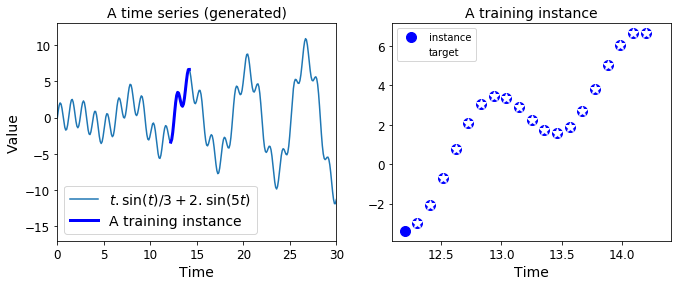

In [46]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.savefig("time_series_plot")
plt.show()
         

In [47]:
X_batch, y_batch = next_batch(1, n_steps)

In [48]:
np.c_[X_batch[0], y_batch[0]]

array([[-4.50341339, -4.14236382],
       [-4.14236382, -3.92870702],
       [-3.92870702, -4.0488651 ],
       [-4.0488651 , -4.59566362],
       [-4.59566362, -5.54426493],
       [-5.54426493, -6.75703201],
       [-6.75703201, -8.0161452 ],
       [-8.0161452 , -9.07599852],
       [-9.07599852, -9.72255772],
       [-9.72255772, -9.82515641],
       [-9.82515641, -9.36805638],
       [-9.36805638, -8.45405093],
       [-8.45405093, -7.27923294],
       [-7.27923294, -6.08510771],
       [-6.08510771, -5.09977511],
       [-5.09977511, -4.48258027],
       [-4.48258027, -4.28578062],
       [-4.28578062, -4.44260919],
       [-4.44260919, -4.78464929],
       [-4.78464929, -5.08425773]])

# Using an OutputProjectionWrapper

In [49]:
# At each time stepwe now have an output vector of size 100. But what we really need is a single output at each time step.
# The simplest solution is an OutputProjectionWrapper which wraps around the cell and also adds some functionality.


In [50]:
# Let's create the RNN. It will contain 100 recurrent beurons and we will unroll it over 20 time steps since each instance will be 20 inputs long.
# Each input will contain only one feature (the value at that time).
# The targets are also sequences of 20 inputs, each containing a single value:

reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_outputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [51]:
# Here is the code for the OutputProjectionWrapper:

cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)

In [52]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [53]:
# So far so good. Now we need to define the cost function. We will use the Mean Squared Error(MSE), as we did in previous regression tasks.
# Next we will create an Adam Optimizer, the training op, and the variable initialization op as usual:

learning_rate = 0.001
loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [54]:
saver = tf.train.Saver()

In [55]:
# Now on to the execution phase:

n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
            
    saver.save(sess, "./my_time_series_model")

0 	MSE: 11.259661
100 	MSE: 0.4836635
200 	MSE: 0.16478088
300 	MSE: 0.09116672
400 	MSE: 0.07200017
500 	MSE: 0.06348497
600 	MSE: 0.0566475
700 	MSE: 0.050834212
800 	MSE: 0.05238466
900 	MSE: 0.04912186
1000 	MSE: 0.04825784
1100 	MSE: 0.050785255
1200 	MSE: 0.042920403
1300 	MSE: 0.049169898
1400 	MSE: 0.04344405


In [56]:
# Now that the model is trained, we can begin making predictions:

with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_model")
    
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

INFO:tensorflow:Restoring parameters from ./my_time_series_model


In [57]:
y_pred

array([[[-3.4460125 ],
        [-2.483599  ],
        [-1.1469861 ],
        [ 0.64545506],
        [ 2.1533105 ],
        [ 3.0812247 ],
        [ 3.5314007 ],
        [ 3.4618535 ],
        [ 2.800678  ],
        [ 2.0752397 ],
        [ 1.6350708 ],
        [ 1.5983397 ],
        [ 1.9758207 ],
        [ 2.7801843 ],
        [ 3.897629  ],
        [ 5.0930357 ],
        [ 6.1048555 ],
        [ 6.669382  ],
        [ 6.6515107 ],
        [ 6.0375447 ]]], dtype=float32)

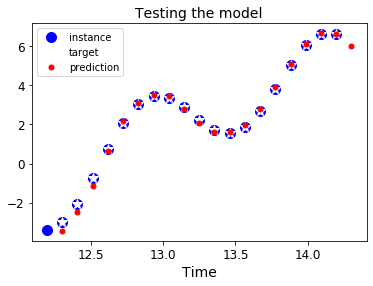

In [58]:
# The following code below outputs a graph of the predicted sequence:

plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.savefig("time_series_pred_plot")
plt.show()

# Output Dimensionality Reduction without using an OutputProjectionWrapper

In [59]:
# Although the OutputProjectionWrapper is the simplest solution to reduce the dimensionality of the RNN output, it's not the most efficient.
# There is a trickier but more efficient solution:
    # You can reshape the RNN outputs from [batch_size, n_steps, n_neurons] to [batch_size * n_steps, n_outputs] and then reshape this tensor to [batch_size, n_steps, n_outputs]

In [60]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [61]:
cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [62]:
n_outputs = 1
learning_rate = 0.001

In [63]:
# Then we stack all the outputs using the reshape() operation.
# Next applythe fully connected linear layer (without using any activation function)
# Finally, unstack all the outputs, again using reshape():


stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

In [64]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [65]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
            
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    
    saver.save(sess, "./my_time_series_model")

0 	MSE: 10.162242
100 	MSE: 0.40608266
200 	MSE: 0.1165469
300 	MSE: 0.06869673
400 	MSE: 0.06895858
500 	MSE: 0.0625274
600 	MSE: 0.05617497
700 	MSE: 0.050717346
800 	MSE: 0.051651455
900 	MSE: 0.05020684
1000 	MSE: 0.049724173
1100 	MSE: 0.050649423
1200 	MSE: 0.041374862
1300 	MSE: 0.050178237
1400 	MSE: 0.044072773


In [66]:
y_pred

array([[[-3.40363  ],
        [-2.454807 ],
        [-1.1076055],
        [ 0.8598127],
        [ 2.1939662],
        [ 3.038181 ],
        [ 3.4420674],
        [ 3.4046931],
        [ 2.8983197],
        [ 2.2327323],
        [ 1.629604 ],
        [ 1.4809326],
        [ 1.9133439],
        [ 2.8109238],
        [ 3.991306 ],
        [ 5.171907 ],
        [ 6.1610603],
        [ 6.6561213],
        [ 6.5713935],
        [ 5.9756618]]], dtype=float32)

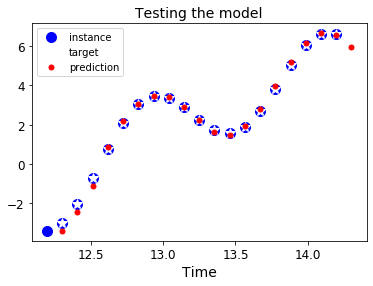

In [67]:

plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

# Creative RNN

In [68]:
# Now that we have a model that can predict the future, we can use it to generate some creative sequences.
# All we need it to provide it a seed sequence containing n_steps values.
# Next use the model to predict the next value.
# Append this predicted value to the sequence.
# Feed the last n_steps values to the model to predict the next value... And so on.


In [69]:
with tf.Session() as sess:                        # not shown in the book
    saver.restore(sess, "./my_time_series_model") # not shown

    sequence = [0.] * n_steps
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./my_time_series_model


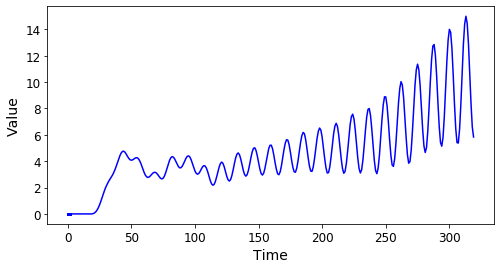

In [70]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(sequence)), sequence, "b-")
plt.plot(t[:n_steps], sequence[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

INFO:tensorflow:Restoring parameters from ./my_time_series_model


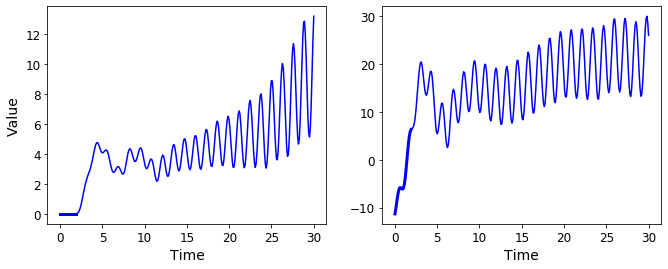

In [71]:
with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_model")
    
    sequence1 = [0. for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence1[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence1.append(y_pred[0, -1, 0])
        
    sequence2 = [time_series(i * resolution + t_min + (t_max-t_min/3)) for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence2[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence2.append(y_pred[0, -1, 0])
        
plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.plot(t, sequence1, "b-")
plt.plot(t[:n_steps], sequence1[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.plot(t, sequence2, "b-")
plt.plot(t[:n_steps], sequence2[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.savefig("creative_sequence_plot")
plt.show()
        


# Deep RNN

In [72]:
# It is quite common to stack multiple layers of cells. This is called deep RNN.
# To implement a deep RNN in TensorFlow, you can create several cells and stack them into a MultiRNNCell.

# In the following code, we stack3 identical cells(but you could very well use various kinds of cells with a different number of neurons):

reset_graph()

n_inputs = 2
n_steps = 5

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

In [74]:
n_neurons = 100
n_layers = 3

layers = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons) for layer in range(n_layers)]
multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [75]:
init = tf.global_variables_initializer()

In [76]:
X_batch = np.random.rand(2, n_steps, n_inputs)

In [77]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch})

In [78]:
outputs_val.shape

(2, 5, 100)

# Distributing a Deep RNN Across Multiple GPUs

In [80]:
# Do Not do this:


with tf.device("/gpu:0"):  # BAD! This is ignored.
    layer1 = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)

with tf.device("/gpu:1"):  # BAD! Ignored again.
    layer2 = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)

In [81]:
# Instead you need a DeviceCellWrapper:

import tensorflow as tf

class DeviceCellWrapper(tf.nn.rnn_cell.RNNCell):
    def __init__(self, device, cell):
        self._cell = cell
        self._device = device
        
    @property
    def state_size(self):
        return self._cell.state_size
    
    @property
    def output_size(self):
        return self._cell.output_size
    
    def __call__(self, inputs, state, scope=None):
        with tf.device(self.device):
            return self._cell(inputs, state, scope)

In [82]:
reset_graph()

n_inputs = 5
n_steps = 20
n_neurons = 100

X = tf.placeholder(tf.float32, shape=[None, n_steps, n_inputs])

In [84]:

devices = ["/cpu:0", "/cpu:0", "/cpu:0"] # replace with ["/gpu:0", "/gpu:1", "/gpu:2"] if you have 3 GPUs
cells = [DeviceCellWrapper(dev,tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons))
         for dev in devices]
multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(cells)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

AttributeError: 'DeviceCellWrapper' object has no attribute 'device'

# Dropout

In [85]:
# If you build a very deep RNN, it may end up overfitting the training set.
# To prevent overfitting, you can apply dropout.
# You can simply add a dropout layer before or after the RNN as usual.
# But if you also want to apply dropout between the RNN layers, you need to use a DropoutWrapper.

# The following code applies dropout to the inputs of each layer in RNN:

reset_graph()

n_inputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1

In [87]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [88]:
# The input_keep_prob parameter can be a placeholder, making it possible to set it to any value you want during training and to to 1.0 during testing (effectively turning dropout off).
# This is a much more elegant solution than what was recommended in earlier versions of the book(writing your own wrapper class or having a separate model for training and testing)

In [89]:
keep_prob = tf.placeholder_with_default(1.0, shape=())
cells = [tf.nn.rnn_cell. BasicRNNCell(num_units=n_neurons) for layer in range(n_layers)]
cells_drop = [tf.nn.rnn_cell.DropoutWrapper(cell, input_keep_prob=keep_prob) for cell in cells]
multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(cells_drop)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [90]:
learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()


In [91]:
# During training, you can feed any value you want to the keep_prob placeholder:
n_iterations = 1500
batch_size = 50
train_keep_prob = 0.5

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        _, mse = sess.run([training_op, loss],
                           feed_dict={X: X_batch, y: y_batch,
                                     keep_prob: train_keep_prob})
        if iteration % 100 == 0:
            print(iteration, "Training MSE:", mse)
            
    saver.save(sess, "./my_dropout_time_series_model")

0 Training MSE: 17.242
100 Training MSE: 4.403504
200 Training MSE: 3.2548358
300 Training MSE: 3.2512114
400 Training MSE: 2.6099174
500 Training MSE: 3.2807064
600 Training MSE: 3.2815099
700 Training MSE: 3.3469024
800 Training MSE: 5.190358
900 Training MSE: 3.76929
1000 Training MSE: 4.0249763
1100 Training MSE: 4.1231604
1200 Training MSE: 3.5407286
1300 Training MSE: 4.334998
1400 Training MSE: 3.7720826


In [92]:
# During testing, you should let keep_prob default to 1.0, effectively turning dropout off:
# Remember, dropout should only be active during training:

with tf.Session() as sess:
    saver.restore(sess, "./my_dropout_time_series_model")
    
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    
# Note that it is also possible to apply dropout to the outputs by setting out put_keep_prob.
# Since TensorFlow 1.1, it is also possible to apply dropout to the cell's state using state_keep_prob.

INFO:tensorflow:Restoring parameters from ./my_dropout_time_series_model


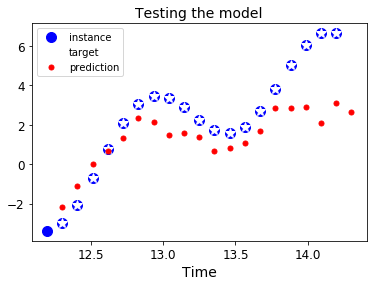

In [94]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

# It seems that Dropout doesn't help at all in this particular case.

# LSTM Cell

In [95]:
# LSTM stands for Long Short Term Memory.
# This is one of the cells that was created to help a RNN remember earlier data in earlier time steps.
# There is a tendency for RNN over extensive time steps to forget early data and this can have an effect on accurate predictions.

# An LSTM cell can be used very much like a basic cell,except it will perform much better.
# Training will converge faster and it will detect long-term dependencies in data.

reset_graph()

lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons)

In [96]:
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
n_layers = 3

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

lstm_cells = [tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons) for layer in range(n_layers)]

multi_cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
top_layer_h_state = states[-1][-1]
logits = tf.layers.dense(top_layer_h_state, n_outputs, name="softmax")
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()


In [97]:
states

(LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_2:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_5:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_6:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_7:0' shape=(?, 150) dtype=float32>))

In [98]:
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Last batch accuracy:", acc_batch, "Test accuracy:", acc_test)

0 Last batch accuracy: 0.97333336 Test accuracy: 0.9472
1 Last batch accuracy: 0.96 Test accuracy: 0.9673
2 Last batch accuracy: 0.96666664 Test accuracy: 0.9681
3 Last batch accuracy: 0.99333334 Test accuracy: 0.9822
4 Last batch accuracy: 0.98 Test accuracy: 0.9845
5 Last batch accuracy: 0.99333334 Test accuracy: 0.9844
6 Last batch accuracy: 0.9866667 Test accuracy: 0.9862
7 Last batch accuracy: 0.99333334 Test accuracy: 0.9871
8 Last batch accuracy: 0.99333334 Test accuracy: 0.9842
9 Last batch accuracy: 1.0 Test accuracy: 0.9846


In [99]:
# Peephole connections allow a basic LSTM cell to look at the long-term memory state, not just the input and previous short term state.
# The previous long-term state is added as an input to the controllers of the forget gate and input gate.
# The current long-term state is added as input to the controller of the output gate.

lstm_cell = tf.nn.rnn_cell.LSTMCell(num_units=n_neurons, use_peepholes=True)


In [100]:
# The Gated Recurrent Unit(GRU) cell is a simplified version of the LSTM cell and seems to perform just as well.
# The main simplifications are:
    # Both state vector merged into single vector.
    # A single gate controller controls both the forget gate and input gate.
    # There's no output gate; the full state vector is output at every time step.
    
gru_cell = tf.nn.rnn_cell.GRUCell(num_units=n_neurons)

# Embeddings for Natural Language Processing

In [101]:
# Embeddings are dense vectors (eg. 150 dimensions) that are used to represent a single word.
# As the RNN is trained, more similar words will have more and more similar embeddings as backpropagation occurs.
# At first, embeddings are random... But as training progresses, different groups form (nouns, verbs, plural, etc...)
# Once trained, word embeddings can be reused across different NLP models. In fact, you can download pretrained word embeddings to speed up training or improve performance.

# NLP Fetch the Data

In [103]:
from six.moves import urllib

import errno
import os
import zipfile

WORDS_PATH = "datasets/words"
WORDS_URL = 'http://mattmahoney.net/dc/text8.zip'

def mkdir_p(path):
    """Create directories, ok if they already exist.
    
    This is for python 2 support. In python >=3.2, simply use:
    >>> os.makedirs(path, exist_ok=True)
    """
    try:
        os.makedirs(path)
    except OSError as exc:
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise



def fetch_words_data(words_url=WORDS_URL, words_path=WORDS_PATH):
    os.makedirs(words_path, exist_ok=True)
    zip_path = os.path.join(words_path, "words.zip")
    if not os.path.exists(zip_path):
        urllib.request.urlretrieve(words_url, zip_path)
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    return data.decode("ascii").split()

In [104]:
words = fetch_words_data()

In [105]:
words[:5]

['anarchism', 'originated', 'as', 'a', 'term']

# Build the dictionary

In [106]:
from collections import Counter

vocabulary_size = 50000

vocabulary = [("UNK", None)] + Counter(words).most_common(vocabulary_size - 1)
vocabulary = np.array([word for word, _ in vocabulary])
dictionary = {word: code for code, word in enumerate(vocabulary)}
data = np.array([dictionary.get(word, 0) for word in words])

In [107]:
" ".join(words[:9]), data[:9]

('anarchism originated as a term of abuse first used',
 array([5234, 3081,   12,    6,  195,    2, 3134,   46,   59]))

In [108]:
" ".join([vocabulary[word_index] for word_index in [5241, 3081, 12, 6, 195, 2, 3134, 46, 5, 9]])

'cycles originated as a term of abuse first in nine'

In [109]:
words[24], data[24]

('culottes', 0)

# Generate batches

In [114]:
from collections import deque

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=[batch_size], dtype=np.int32)
    labels = np.ndarray(shape=[batch_size, 1], dtype=np.int32)
    span = 2 * skip_window + 1 # [skip_window target skip_window]
    buffer = deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips):
        target = skip_window # target label at the center of the buffer
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = np.random.randint(0, span)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels

In [115]:
np.random.seed(42)

In [116]:
data_index = 0
batch, labels = generate_batch(8, 2, 1)

In [117]:
batch, [vocabulary[word] for word in batch]

(array([3081, 3081,   12,   12,    6,    6,  195,  195], dtype=int32),
 ['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term'])

In [118]:
labels, [vocabulary[word] for word in labels[:, 0]]

(array([[  12],
        [5234],
        [   6],
        [3081],
        [  12],
        [ 195],
        [   2],
        [   6]], dtype=int32),
 ['as', 'anarchism', 'a', 'originated', 'as', 'term', 'of', 'a'])

# Build the Model

In [131]:
batch_size = 128
embedding_size = 128  # Dimension of the embedding vector.
skip_window = 1       # How many words to consider left and right.
num_skips = 2         # How many times to reuse an input to generate a label.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent.
valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
num_sampled = 64    # Number of negative examples to sample.

learning_rate = 0.01

In [132]:
reset_graph()

# Input data.
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

In [133]:
vocabulary_size = 50000
embedding_size = 150

# Look up embeddings for inputs.
init_embeds = tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)
embeddings = tf.Variable(init_embeds)

In [134]:
train_inputs = tf.placeholder(tf.int32, shape=[None])
embed = tf.nn.embedding_lookup(embeddings, train_inputs)

In [136]:
# Construct the variables for the NCE loss
nce_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                        stddev=1.0 / np.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

# Compute the average NCE loss for the batch.
# tf.nce_loss automatically draws a new sample of the negative labels each
# time we evaluate the loss.
loss = tf.reduce_mean(
    tf.nn.nce_loss(nce_weights, nce_biases, train_labels, embed,
                   num_sampled, vocabulary_size))

# Construct the Adam optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

# Compute the cosine similarity between minibatch examples and all embeddings.
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), axis=1, keep_dims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)

# Add variable initializer.
init = tf.global_variables_initializer()

# Train the model

In [138]:
num_steps = 10001

with tf.Session() as session:
    init.run()
    
    average_loss = 0
    for step in range(num_steps):
        print("\rIteration: {}".format(step), end="\t")
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs : batch_inputs, train_labels : batch_labels}
        
        # We perform one update step by evaluateing the training op (including it).
        # in the list of returned values for session.run()
        _, loss_val = session.run([training_op, loss], feed_dict=feed_dict)
        average_loss += loss_val
        
        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
            # The average loss is an estimate of the loss over the last 2000 batches.
            print("Average loss at step", step, ":", average_loss)
            average_loss = 0
            
        # Note that this is expensive (~20% slowdown if computed every 500 steps)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = vocabulary[valid_examples[i]]
                top_k = 8 # number  of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log_str = "Nearest to %s:" % valid_word
                for k in range(top_k):
                    close_word = vocabulary[nearest[k]]
                    log_str = "%s %s," % (log_str, close_word)
                print(log_str)
                
    final_embeddings = normalized_embeddings.eval()

Iteration: 0	Average loss at step 0 : 304.84344482421875
Nearest to people: blissymbolics, mike, buffers, untouchables, carolingian, posted, ville, hypertalk,
Nearest to can: intermediary, milder, talon, domineering, marsalis, michael, amines, detachments,
Nearest to than: lame, watts, stones, sram, elves, zarqawi, applets, cloves,
Nearest to its: knob, abeokuta, bracelet, bastards, ivens, objectivity, blanton, cold,
Nearest to their: gaye, parsing, producer, afghana, javier, detrimental, lesbos, kin,
Nearest to have: india, bubba, atheromatous, bauds, userbase, englishmen, supersymmetry, casuistry,
Nearest to six: melds, signer, hurtful, paws, ev, melodies, perennially, adf,
Nearest to over: tt, tuned, manichaeans, fractional, cambridge, balaguer, fluoride, strenuously,
Nearest to two: annihilate, bettors, wir, cindy, epinephrine, team, voluntarily, crystallize,
Nearest to UNK: reykjav, fi, mainline, rosalyn, archaeologist, armstrong, stevenage, squirrels,
Nearest to was: russo, ramme

In [145]:
np.save("./my_final_embeddings.npy", final_embeddings)

# Plot the embeddings

In [148]:
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18)) #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                    xy=(x, y),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')

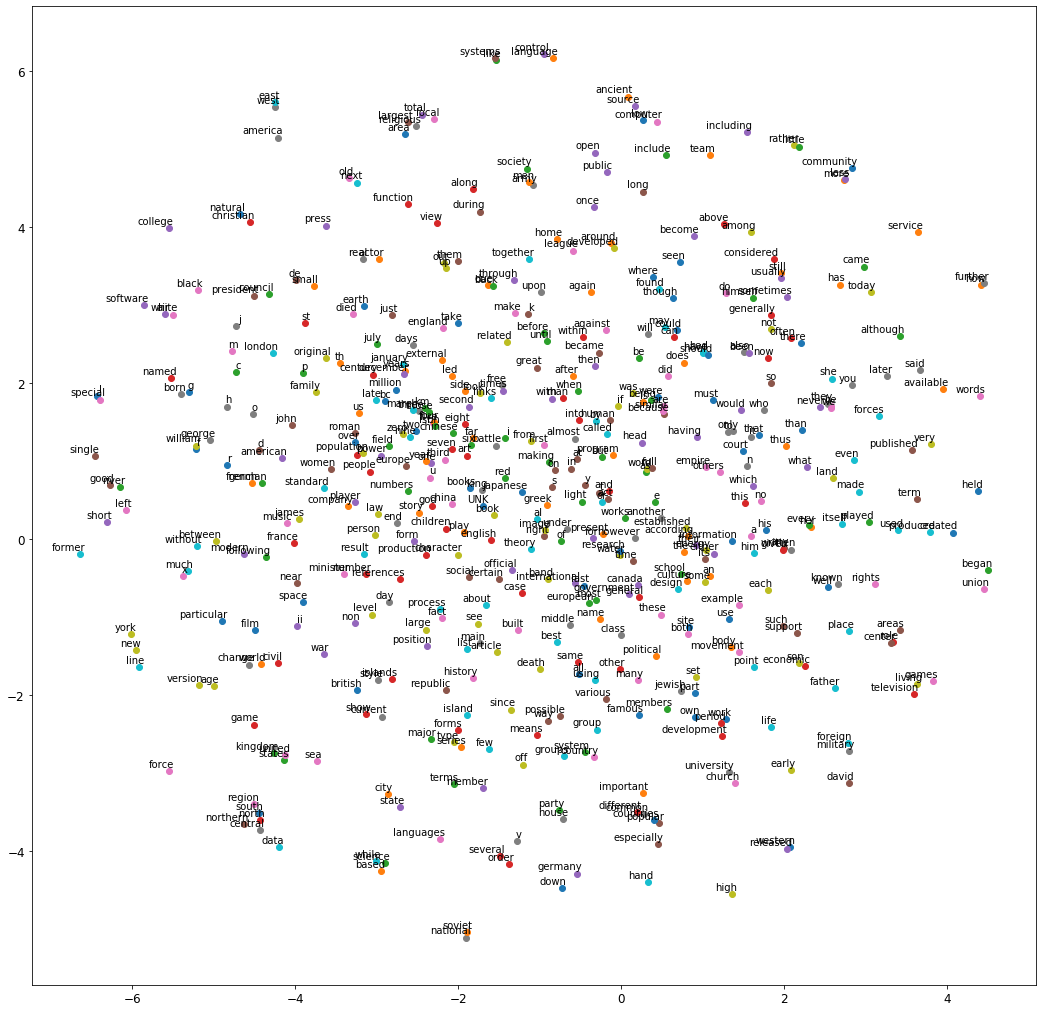

In [149]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])
labels = [vocabulary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)

# Machine Translation

In [150]:
# The basic_rnn_seq2seq() function creates a simple Encoder/Decoder model:
# It first runs an RNN to encode encoder_inputs into a state_vector, then runs a decoder initialized with the last encoder state on decoder_inputs.
# Encoder and decoder use the same RNN cell type but they don't share parameters.

In [152]:
import tensorflow as tf
reset_graph()

n_steps = 50
n_neurons = 200
n_layers = 3
num_encoder_symbols = 20000
num_decoder_symbols = 20000
embedding_size = 150
learning_rate = 0.01

X = tf.placeholder(tf.int32, [None, n_steps]) # English sentences
Y = tf.placeholder(tf.int32, [None, n_steps]) # French translations
W = tf.placeholder(tf.float32, [None, n_steps - 1, 1])
Y_input = Y[:, :-1]
Y_target = Y[:, 1:]

encoder_inputs = tf.unstack(tf.transpose(X)) # list of 1D tensors
decoder_inputs = tf.unstack(tf.transpose(Y_input)) # list of 1D tensors

lstm_cells = [tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons)
             for layer in range(n_layers)]
cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)

output_seqs, states = tf.contrib.legacy_seq2seq.embedding_rnn_seq2seq(
    encoder_inputs,
    decoder_inputs,
    cell,
    num_encoder_symbols,
    num_decoder_symbols,
    embedding_size)

logits = tf.transpose(tf.unstack(output_seqs), perm=[1, 0, 2])


In [153]:
logits_flat = tf.reshape(logits, [-1, num_decoder_symbols])
Y_target_flat = tf.reshape(Y_target, [-1])
W_flat = tf.reshape(W, [-1])
xentropy = W_flat * tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y_target_flat, logits=logits_flat)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()